# Introduction

Source : [Mental Health in tech survey (2014)](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)

The purpose of this project is

# Prelimineries

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # number and array manipulation
import pandas as pd # data manipulation

# plot visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# performance evaluations libraries
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score

# Libraries for data imbalance
from imblearn.pipeline import Pipeline as imbPipeline

## Dataset Information

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KAGGLE/Mental Health/mental_health_2014.csv')

# The dataset has 1259 datas(rows) and 27 features(columns)
print(df.shape, '\n')

# Show the dataset 5 rows only
df.head()

(1259, 27) 



,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# The complete information of the raw dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# How many null in each features?
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

* There are a total of 26 columns in the dataset.
>

* We see that except the age column, all the columns are of object datatype.
>

* Comment column seems to contain most number ( 70% ) of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.
>

* We will be dropping the timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.
>

* The state column also contains a lot of null values. We'll dig deeper into that.

# Data Cleaning

In [ ]:
# We want to look at the number of respondents' country
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [ ]:
# state is the
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

* It will be really misleading to conclude that a certain country faces more problem with the mental health of employees because around 60% of the people belong to The US.
>
* Moreover there are a lot of countries which have only one respondents.
>
* The country column thus becomes pointless. We will be dopping this.
>
* A quick look at the states suggest us that it is applicable for the one's only in The US, so we'll drop it as well.

In [ ]:
# deleting unimportant features
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [ ]:
# showing the table after dropping
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Data Preparation

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']

In [ ]:
# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    else:
        print('Error: Feature %s not recognized.' % feature)

# Show the table
print(df.shape, '\n')
df.head()

(1259, 23) 



,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Age

In [ ]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [ ]:
# The minimal age to work is 18 years old
df.drop(df[df['Age'] < 18].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

## Gender

In [ ]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [ ]:
# unique's male gender
males = ['M', 'Male', 'male', 'm', 'maile', 'Cis Male', 'Mal', 'Male (CIS)',
         'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']

# unique's female gender
females = ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman',
           'Female ', 'cis-female/femme', 'Female (cis)', 'femail']

# unique's undefined gender
lgbts = ['Male-ish', 'Trans-female', 'something kinda male?', 'queer/she/they',
         'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne',
         'Agender', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman',
         'Neuter', 'Female (trans)', 'queer', 'ostensibly male, unsure what that really means']

# unique's unimportant or illogical gender
spam = ['A little about you', 'p']

In [ ]:
for m in males:
  df['Gender'] = df['Gender'].replace(m, 'male')

for f in females:
  df['Gender'] = df['Gender'].replace(f, 'female')

for l in lgbts:
  df['Gender'] = df['Gender'].replace(l, 'lgbt')

In [ ]:
 df = df[~df['Gender'].isin(spam)]

In [ ]:
df['Gender'].unique()

array(['female', 'male', 'lgbt'], dtype=object)

In [ ]:
df['Gender'].value_counts()

male      985
female    247
lgbt       19
Name: Gender, dtype: int64

In [ ]:
df = df[df['Gender'] != 'lgbt']

## Self Employed

In [ ]:
df['self_employed'].value_counts()

No     1074
Yes     140
NaN      18
Name: self_employed, dtype: int64

In [ ]:
# Only 0.014% of self employed so let's change NaN to NOT self_employed
# Replace "NaN" string from defaultString

df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].value_counts())

No     1092
Yes     140
Name: self_employed, dtype: int64


## Work Interfere

In [ ]:
df['work_interfere'].value_counts()

Sometimes    453
NaN          261
Never        211
Rarely       169
Often        138
Name: work_interfere, dtype: int64

In [ ]:
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Don\'t know')
print(df['work_interfere'].value_counts())

Sometimes     453
Don't know    261
Never         211
Rarely        169
Often         138
Name: work_interfere, dtype: int64


# Exploratory Data Analysis

In [ ]:
for col in df.columns:
  print('Feature : ', col, '\n', df[col].unique(), '\n')

Feature :  Age 
 [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72] 

Feature :  Gender 
 ['female' 'male'] 

Feature :  self_employed 
 ['No' 'Yes'] 

Feature :  family_history 
 ['No' 'Yes'] 

Feature :  treatment 
 ['Yes' 'No'] 

Feature :  work_interfere 
 ['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 

Feature :  no_employees 
 ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 

Feature :  remote_work 
 ['No' 'Yes'] 

Feature :  tech_company 
 ['Yes' 'No'] 

Feature :  benefits 
 ['Yes' "Don't know" 'No'] 

Feature :  care_options 
 ['Not sure' 'No' 'Yes'] 

Feature :  wellness_program 
 ['No' "Don't know" 'Yes'] 

Feature :  seek_help 
 ['Yes' "Don't know" 'No'] 

Feature :  anonymity 
 ['Yes' "Don't know" 'No'] 

Feature :  leave 
 ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 

Feature :  mental_health_consequence 
 ['No' 'Maybe' 'Yes'] 



## Univariate

### 1. Age

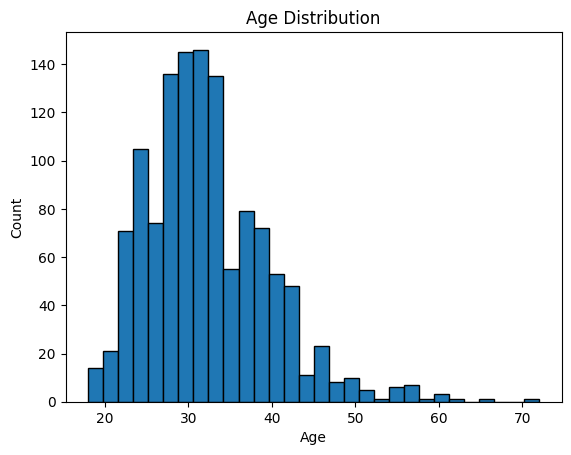

In [ ]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

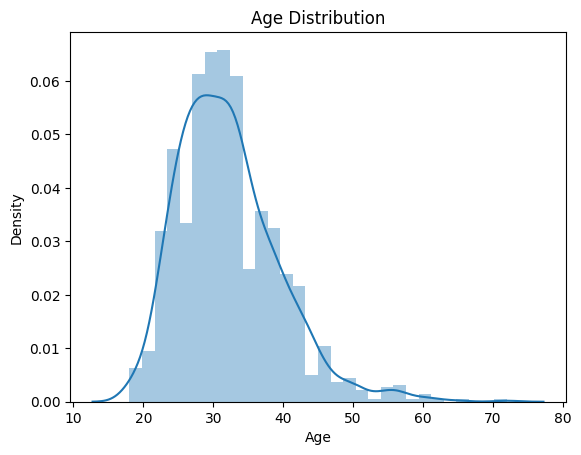

In [ ]:
# Distribution Plot for Age
sns.distplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

### Gender

In [ ]:
df['Gender'].value_counts()

male      985
female    247
Name: Gender, dtype: int64

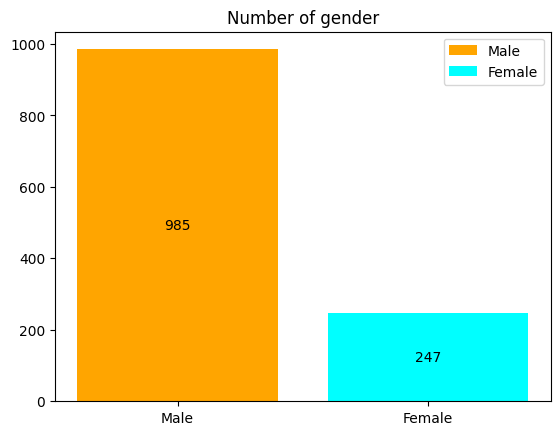

In [ ]:
# Bar plot for gender
gender_val = [985, 247]
gender_cat = ['Male', 'Female']
gender_clr = ['orange', 'cyan']

fig, ax = plt.subplots()

p = ax.bar(gender_cat, gender_val, color=gender_clr, width=0.8, label=gender_cat)

ax.bar_label(p, label_type='center')
ax.set_title('Number of gender')
ax.legend()

plt.show()

### Work Interfere

In [ ]:
df['work_interfere'].value_counts()

Sometimes     453
Don't know    261
Never         211
Rarely        169
Often         138
Name: work_interfere, dtype: int64

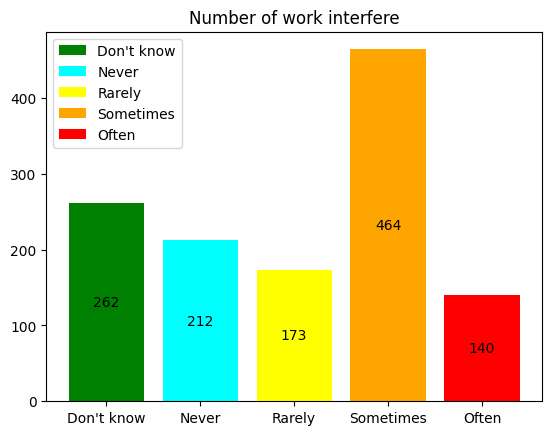

In [ ]:
# Bar plot for gender
gender_val = [262, 212, 173, 464, 140]
gender_cat = ['Don\'t know', 'Never', 'Rarely', 'Sometimes', 'Often']
gender_clr = ['green', 'cyan', 'yellow', 'orange', 'red']

fig, ax = plt.subplots()

p = ax.bar(gender_cat, gender_val, color=gender_clr, width=0.8, label=gender_cat)

ax.bar_label(p, label_type='center')
ax.set_title('Number of work interfere')
ax.legend()

plt.show()

### Family History

In [ ]:
df['family_history'].value_counts()

No     753
Yes    479
Name: family_history, dtype: int64

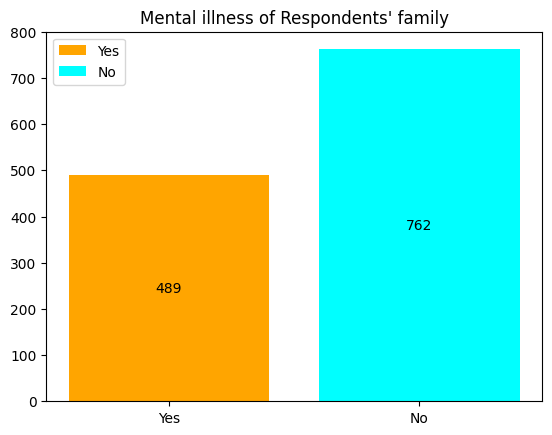

In [ ]:
gender_val = [489, 762]
gender_cat = ['Yes', 'No']
gender_clr = ['orange', 'cyan']

fig, ax = plt.subplots()

p = ax.bar(gender_cat, gender_val, color=gender_clr, width=0.8, label=gender_cat)

ax.bar_label(p, label_type='center')
ax.set_title('Mental illness of Respondents\' family')
ax.legend()

plt.show()

### Treatment

In [ ]:
df['treatment'].value_counts()

Yes    617
No     615
Name: treatment, dtype: int64

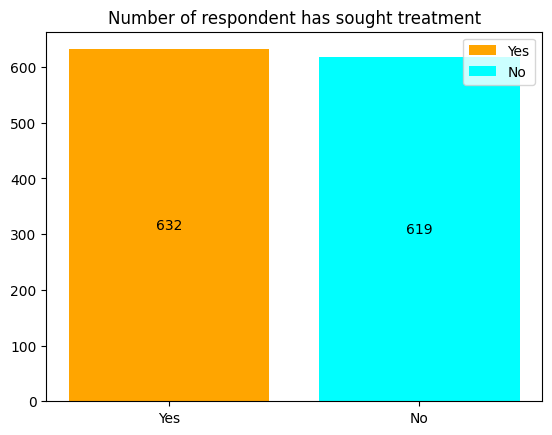

In [ ]:
gender_val = [632, 619]
gender_cat = ['Yes', 'No']
gender_clr = ['orange', 'cyan']

fig, ax = plt.subplots()

p = ax.bar(gender_cat, gender_val, color=gender_clr, width=0.8, label=gender_cat)

ax.bar_label(p, label_type='center')
ax.set_title('Number of respondent has sought treatment')
ax.legend()

plt.show()

## Bivariate

### Age vs Treatment

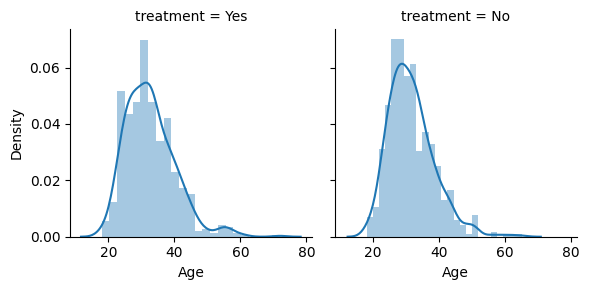

In [ ]:
# Age vs Treatment Distribution (separate by treatment or not)
g = sns.FacetGrid(df, col='treatment')
g = g.map(sns.distplot, "Age")

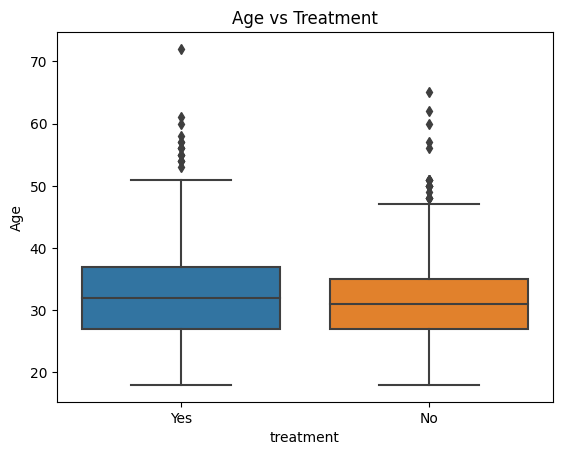

In [ ]:
# Boxplot Age vs Treatment classification
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Age vs Treatment')
plt.show()

### Gender vs Treatment

In [ ]:
# Number of Diabetes by Female
df_female_gender = df[df['Gender']=='female']
print(df_female_gender.shape, '\n')

df_female_gender.groupby('treatment').size()

(247, 23) 



treatment
No      77
Yes    170
dtype: int64

In [ ]:
# Number of Diabetes by Male
df_male_gender = df[df['Gender']=='male']
print(df_male_gender.shape, '\n')

df_male_gender.groupby('treatment').size()

(985, 23) 



treatment
No     538
Yes    447
dtype: int64

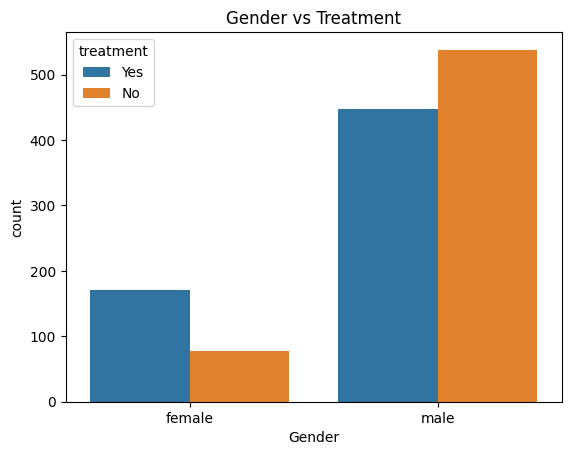

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Gender vs Treatment')
plt.show()

## Multivariate

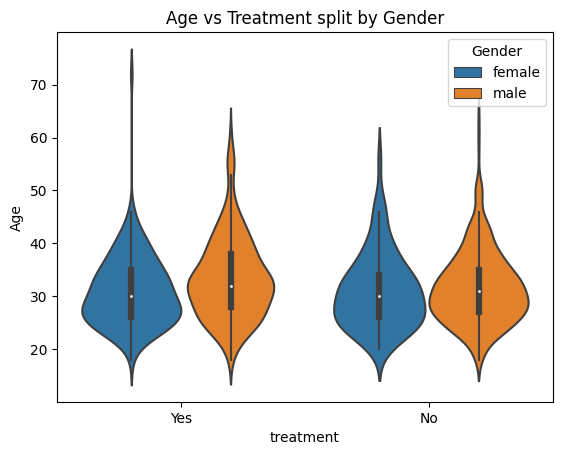

In [ ]:
# Violin plot of Age against diabetes classification split by gender
sns.violinplot(x='treatment', y='Age', hue='Gender', data=df)
plt.title('Age vs Treatment split by Gender')
plt.show()

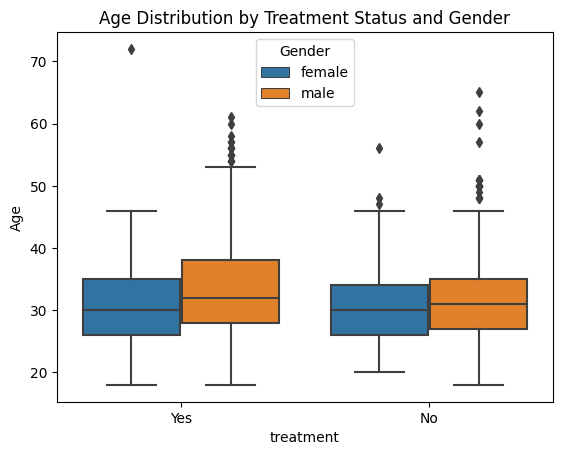

In [ ]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='treatment', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Treatment Status and Gender')
plt.show()

# Encoding

In [ ]:
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [ ]:
le = LabelEncoder()
for col in object_cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])

# Correlation Matrix

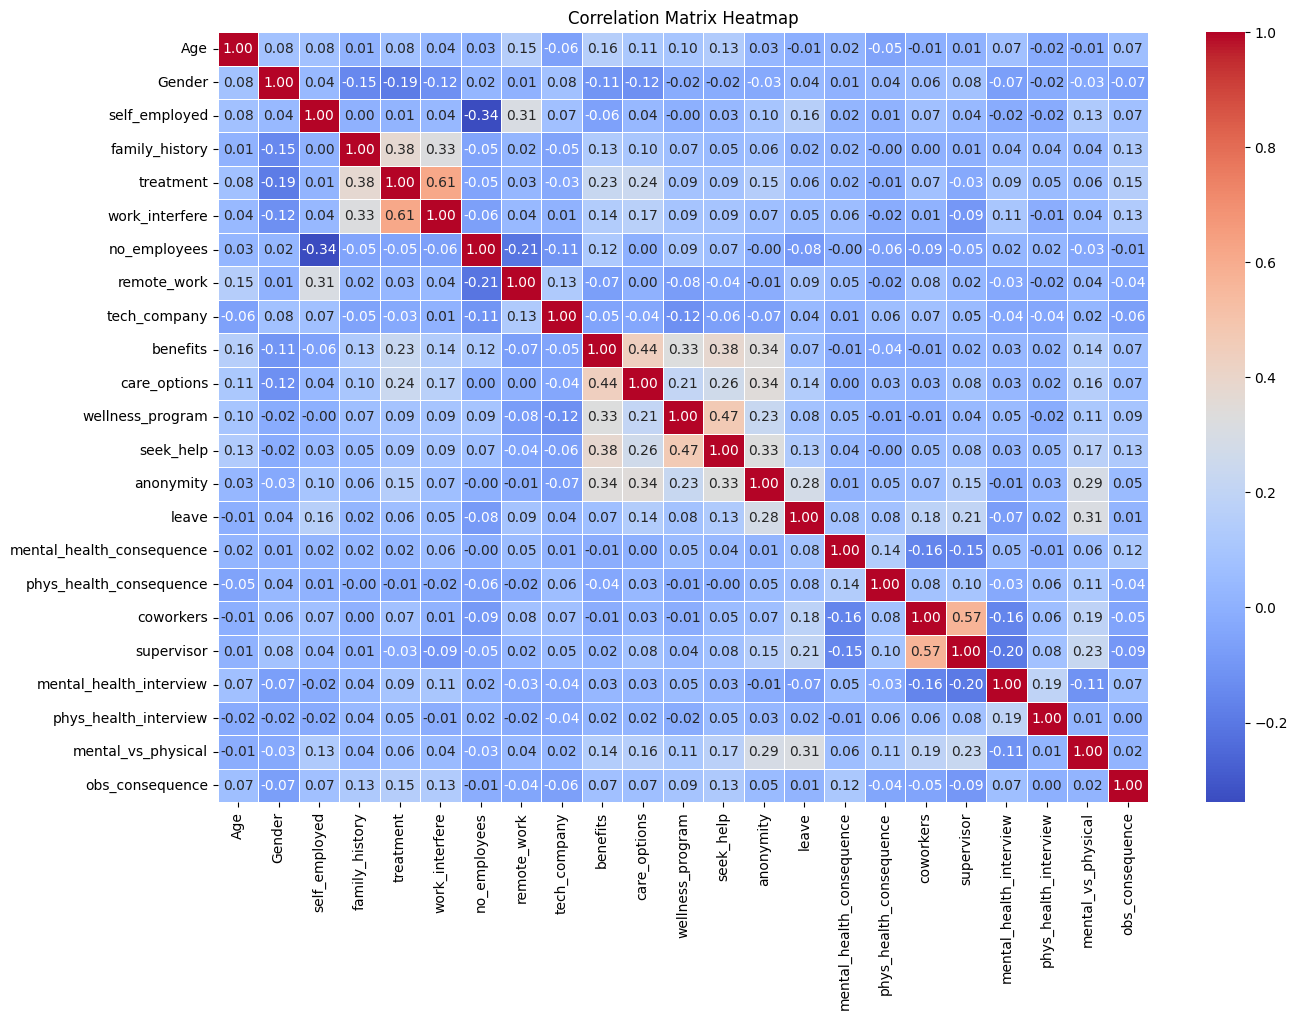

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

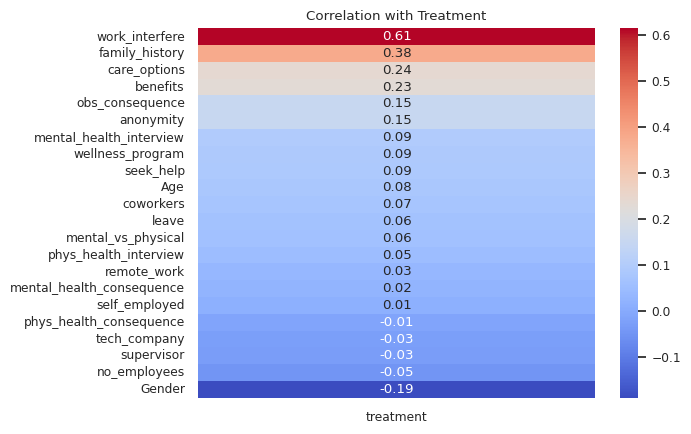

In [ ]:
# Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['treatment'].drop('treatment')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Treatment')
plt.show()

# Data Preprocessing

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

# gives range starting from 1 and ending at 3
array_1d = np.array(df['Age'])
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, range_to_normalize[0], range_to_normalize[1])

# display original and normalized array
print("Original Array = ",array_1d)
print("Normalized Array = ",normalized_array_1d)

Original Array =  [37 44 32 ... 34 46 25]
Normalized Array =  [0.35185185185185186, 0.48148148148148145, 0.25925925925925924, 0.24074074074074073, 0.24074074074074073, 0.2777777777777778, 0.3148148148148148, 0.3888888888888889, 0.4444444444444444, 0.09259259259259259, 0.24074074074074073, 0.2037037037037037, 0.4444444444444444, 0.3333333333333333, 0.16666666666666666, 0.2037037037037037, 0.09259259259259259, 0.25925925925925924, 0.5185185185185185, 0.3333333333333333, 0.2037037037037037, 0.24074074074074073, 0.5185185185185185, 0.42592592592592593, 0.2777777777777778, 0.3148148148148148, 0.2777777777777778, 0.3148148148148148, 0.2962962962962963, 0.35185185185185186, 0.25925925925925924, 0.24074074074074073, 0.2222222222222222, 0.4444444444444444, 0.4074074074074074, 0.16666666666666666, 0.2037037037037037, 0.37037037037037035, 0.5925925925925926, 0.3148148148148148, 0.1111111111111111, 0.3148148148148148, 0.16666666666666666, 0.0, 0.2222222222222222, 0.37037037037037035, 0.18518518518

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,0.481481,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.259259,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,0.240741,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,0.240741,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


# Model Building

In [ ]:
X = df.drop('treatment', axis=1)
y = df['treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-Nearest Neighbors (KNN)

In [ ]:
# To find the optimal k values, use k = sqrt(n) where n is the number of data
n = df.shape[0]
print('The number of data (n) = ', n, '\n')

The number of data (n) =  1232 



In [ ]:
import math as m
k = int(m.sqrt(n))
print('K value = ', k)

# In here we can choose whether 35 or 36 as the k values to find the performances

K value =  35


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_params = [{'n_neighbors': list(range(35, 37)), 'weights': ['uniform', 'distance']}]

In [ ]:
grid_knn = GridSearchCV(knn, knn_params, cv = 10)

grid_knn.fit(X_train, y_train)

print("Best Parameters: ", grid_knn.best_params_)

Best Parameters:  {'n_neighbors': 35, 'weights': 'distance'}


## Logistic Regression

In [ ]:
logr = LogisticRegression()

In [ ]:
logr_params = [{
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 1000]
}]

In [ ]:
grid_logr = GridSearchCV(logr, logr_params, cv = 10)

grid_logr.fit(X_train, y_train)

print("Best Parameters: ", grid_logr.best_params_)

Best Parameters:  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc_params = {
    'criterion': ["gini", "entropy"],
    'max_features': [3, 6, 12],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_dtc = GridSearchCV(dtc, dtc_params, cv = 10)

grid_dtc.fit(X_train, y_train)

print("Best Parameters: ", grid_dtc.best_params_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 12, 'min_samples_leaf': 4, 'min_samples_split': 10}


## Random Forest

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_params = {
    'criterion': ["gini", "entropy"],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_rfc = GridSearchCV(rfc, rfc_params, cv = 10)

grid_rfc.fit(X_train, y_train)

print("Best Parameters: ", grid_rfc.best_params_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# Confusion Matrix and Performance Metrics

## K-Nearest Neighbors (KNN)

In [ ]:
# Predict on the test set using the best model
y_pred_knn = grid_knn.predict(X_test)

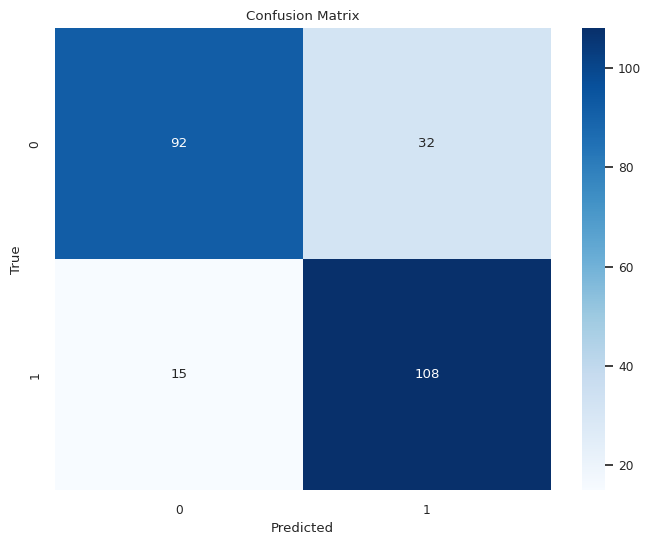

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred_knn), '\n')
print(classification_report(y_test, y_pred_knn))

Model Accuracy:  0.8097165991902834 

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       124
           1       0.77      0.88      0.82       123

    accuracy                           0.81       247
   macro avg       0.82      0.81      0.81       247
weighted avg       0.82      0.81      0.81       247



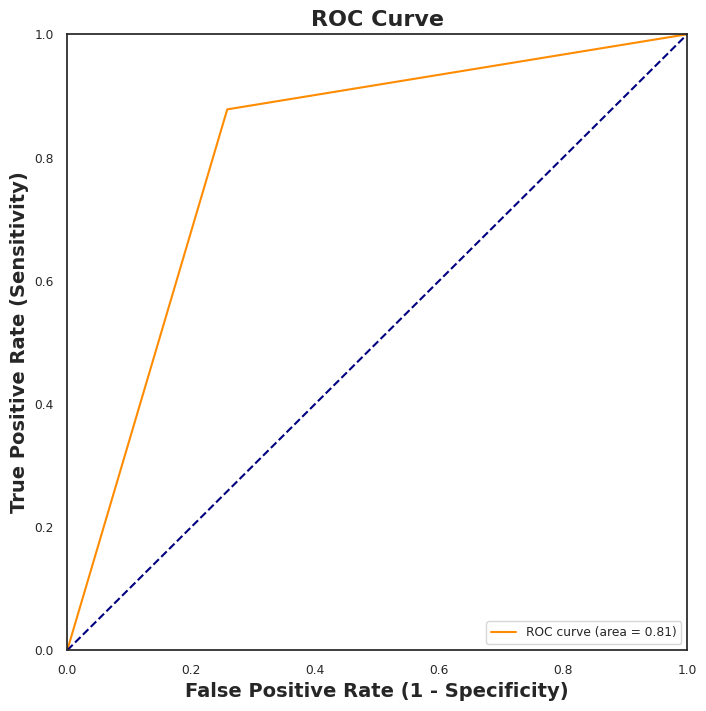

(array([0.        , 0.25806452, 1.        ]),
 array([0.        , 0.87804878, 1.        ]),
 array([2, 1, 0]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

print('\n')
roc_curve(y_test, y_pred_knn)

## Logistic Regression

In [ ]:
# Predict on the test set using the best model
y_pred_logr = grid_logr.predict(X_test)

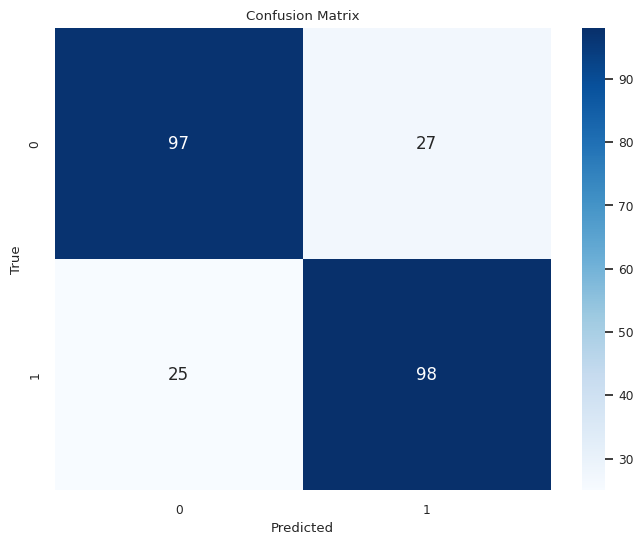

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate the model
print("Model Accuracy : ", accuracy_score(y_test, y_pred_logr), '\n')
print("Model Recall   : ", recall_score(y_test, y_pred_logr), '\n')
print(classification_report(y_test, y_pred_logr))

Model Accuracy :  0.7894736842105263 

Model Recall   :  0.7967479674796748 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       124
           1       0.78      0.80      0.79       123

    accuracy                           0.79       247
   macro avg       0.79      0.79      0.79       247
weighted avg       0.79      0.79      0.79       247



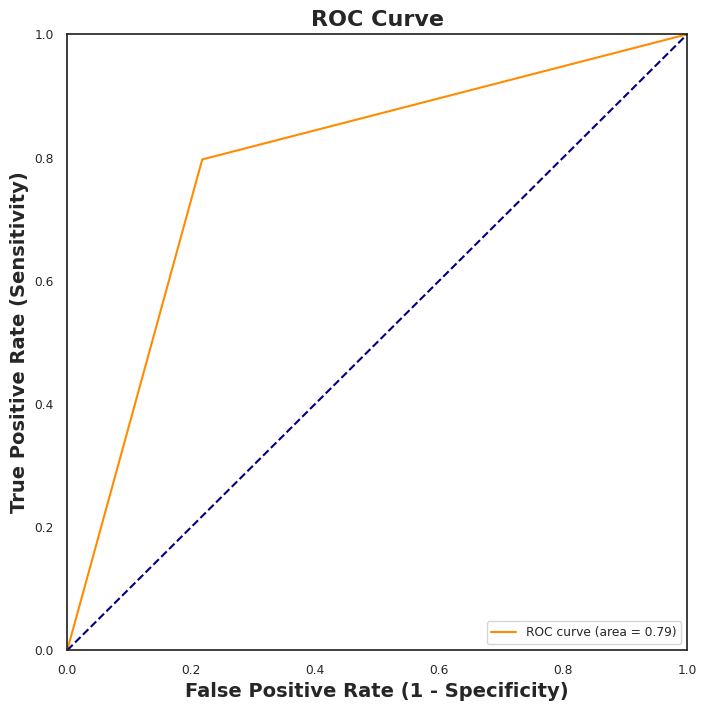

(array([0.        , 0.21774194, 1.        ]),
 array([0.        , 0.79674797, 1.        ]),
 array([2, 1, 0]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logr)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

print('\n')
roc_curve(y_test, y_pred_logr)

## Decision Tree

In [ ]:
# Predict on the test set using the best model
y_pred_dtc = grid_dtc.predict(X_test)

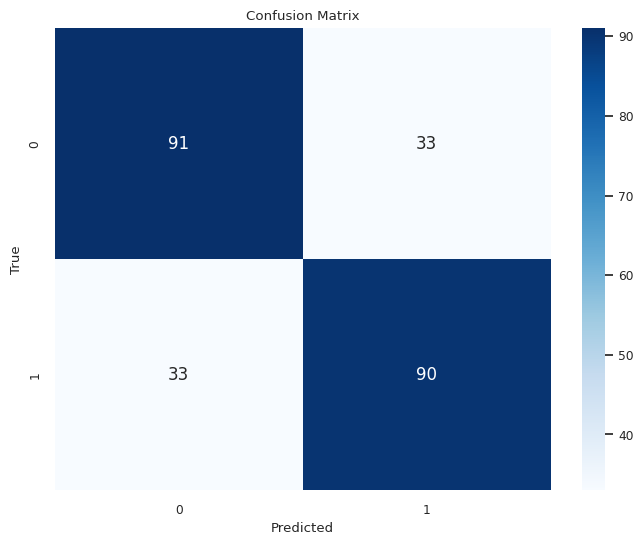

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred_dtc), '\n')
print(classification_report(y_test, y_pred_dtc))

Model Accuracy:  0.7327935222672065 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       124
           1       0.73      0.73      0.73       123

    accuracy                           0.73       247
   macro avg       0.73      0.73      0.73       247
weighted avg       0.73      0.73      0.73       247



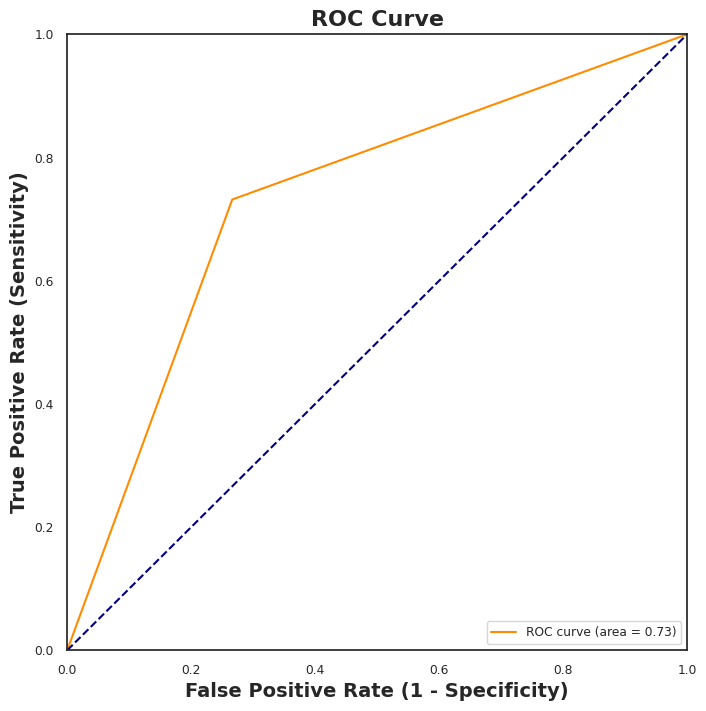

(array([0.        , 0.26612903, 1.        ]),
 array([0.        , 0.73170732, 1.        ]),
 array([2, 1, 0]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

print('\n')
roc_curve(y_test, y_pred_dtc)

## Random Forest

In [ ]:
# Predict on the test set using the best model
y_pred_rfc = grid_rfc.predict(X_test)

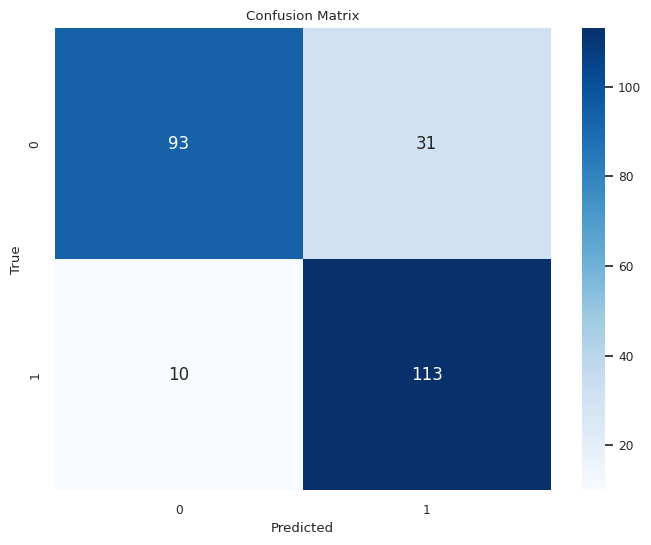

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred_rfc), '\n')
print(classification_report(y_test, y_pred_rfc))

Model Accuracy:  0.8340080971659919 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       124
           1       0.78      0.92      0.85       123

    accuracy                           0.83       247
   macro avg       0.84      0.83      0.83       247
weighted avg       0.84      0.83      0.83       247



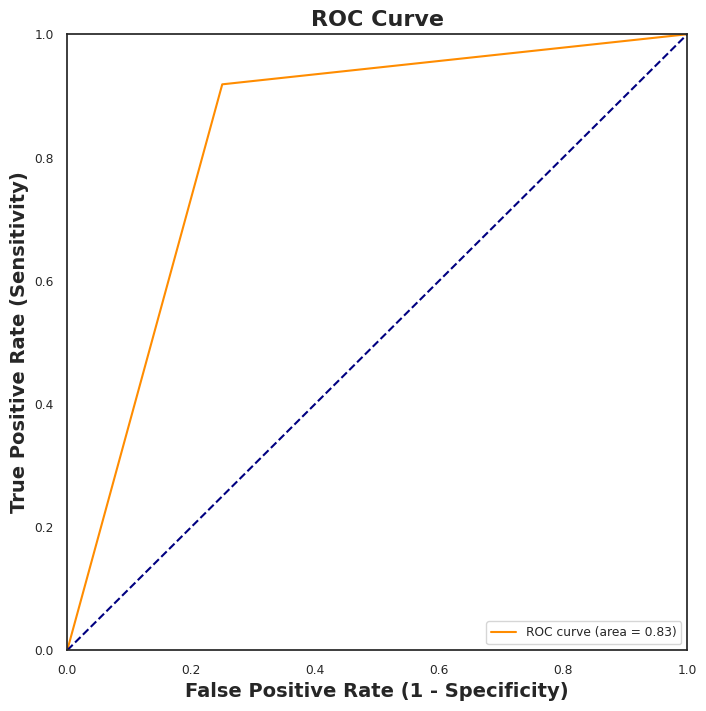

(array([0.  , 0.25, 1.  ]),
 array([0.        , 0.91869919, 1.        ]),
 array([2, 1, 0]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

print('\n')
roc_curve(y_test, y_pred_rfc)